imports

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd
from XGBoost_setup import best_parameters_regression, predict_regression, scores_regression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

## data analyse

import data

In [24]:
df = pd.read_csv("data/regression/Student_Performance.csv")
df.describe().T
#No missing values


,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


data vis

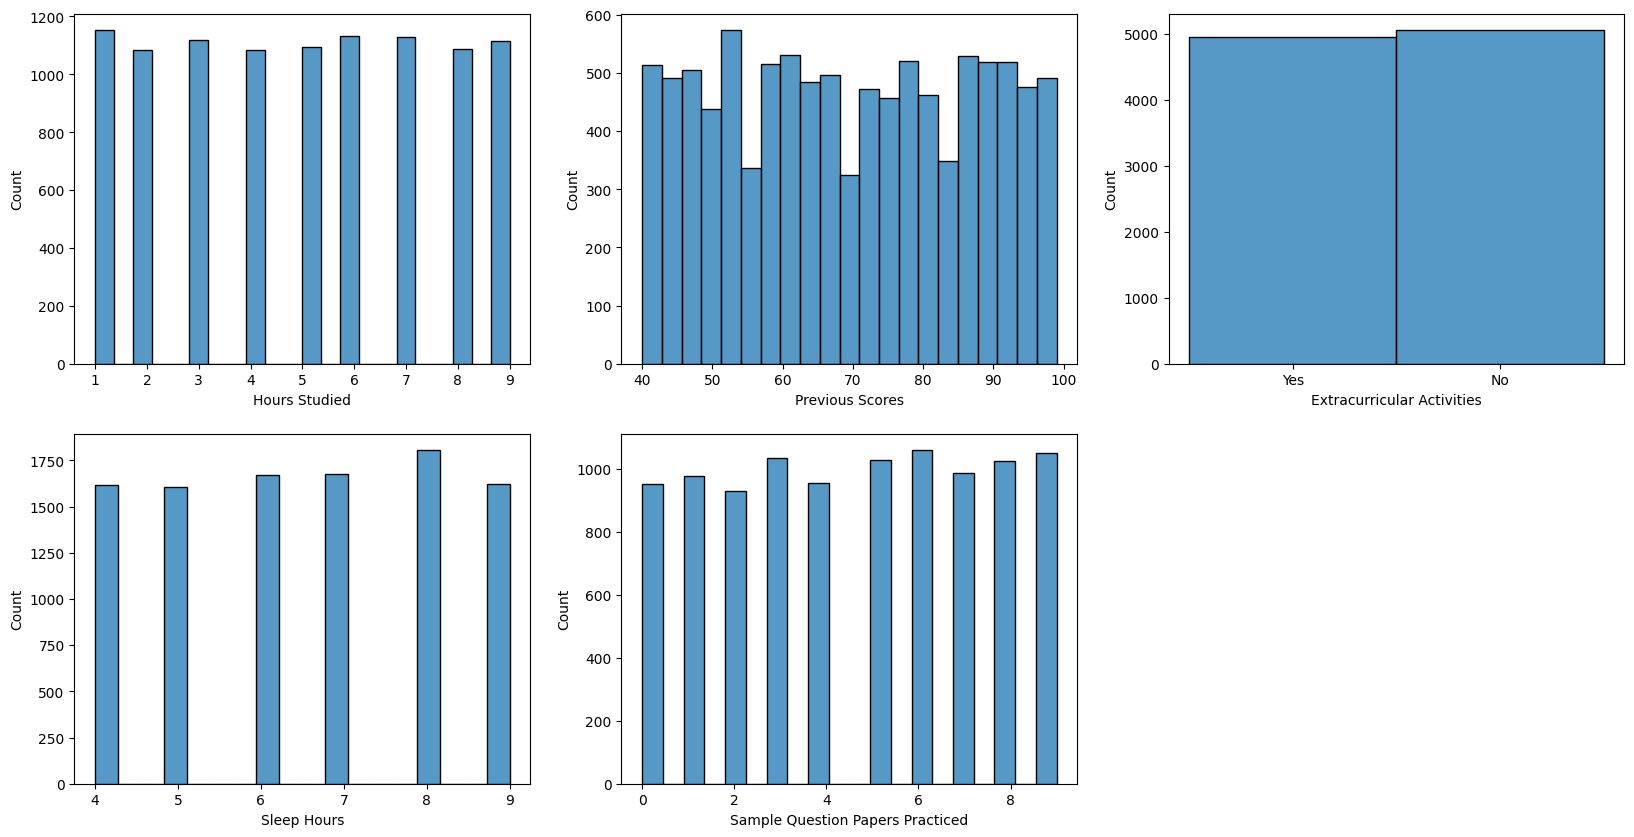

In [25]:
# Determine the number of columns to plot
num_columns = len(df.columns) - 1  # Exclude 'salary_in_usd'
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on the number of columns

fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Track the index for the axes
ax_index = 0

for col in df.columns:
    if col != "Performance Index":
        sns.histplot(data=df, x=col, ax=axes[ax_index])
        ax_index += 1

# Remove any unused subplots
for j in range(ax_index, len(axes)):
    fig.delaxes(axes[j])


if a variable as stronger results than the other this can show a correlation

Need to encode the Extracurricular Activities

In [26]:
label_encoder = LabelEncoder()
df["Extracurricular Activities"] = label_encoder.fit_transform(df["Extracurricular Activities"])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


correlation matrix

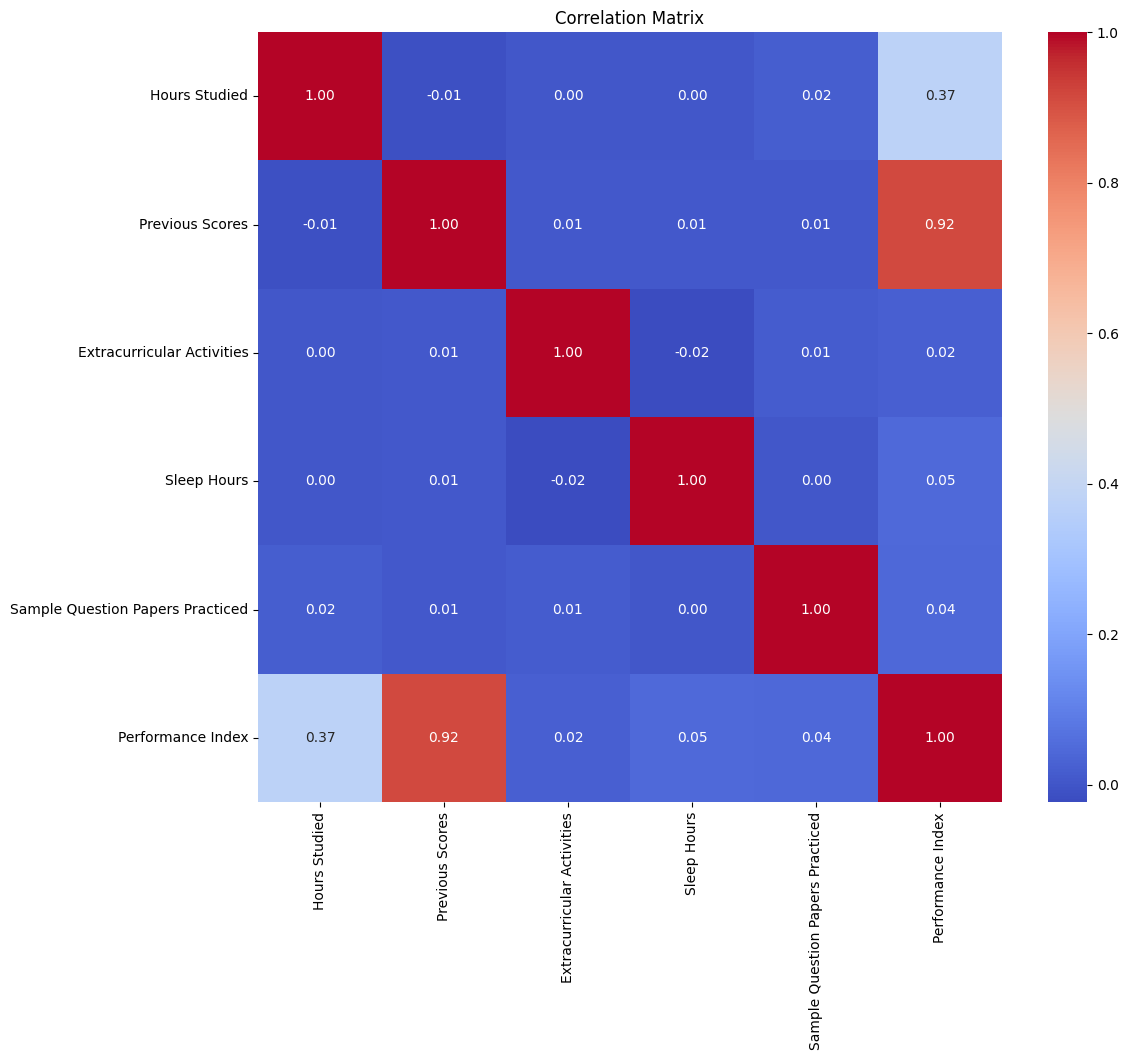

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

corrrelation with the output

In [28]:
corr_matrix["Performance Index"].sort_values(ascending=False)
corr_matrix["Performance Index"]

Hours Studied                       0.373730
Previous Scores                     0.915189
Extracurricular Activities          0.024525
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

## XGBoost use

split the data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Performance Index", axis=1), df["Performance Index"], test_size=0.2, random_state=42)
y_test

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

Processing

100%|██████████| 200/200 [01:11<00:00,  2.79it/s]


{'subsample': 0.5, 'objective': 'reg:squarederror', 'min_child_weight': 30, 'max_depth': 15, 'lambda': 1, 'gamma': 0, 'eta': 0.05, 'alpha': 0}


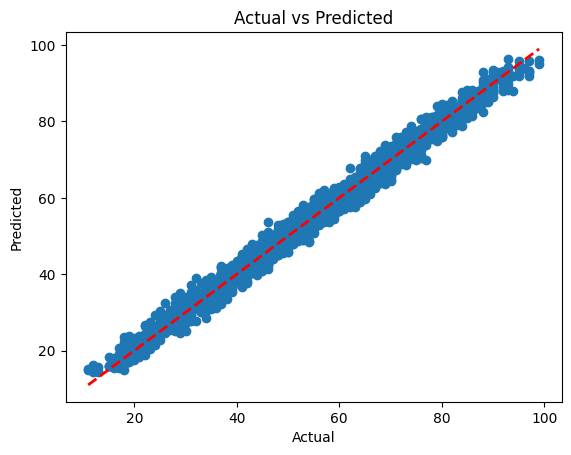

The max error is:  7.799037933349609
The mean absolute error is:  1.6671043424606322
The r2 is:  0.9882284386370364
The root mean squared error is:  2.0886276435006286


In [30]:
best_param,best_score = best_parameters_regression(X_train, y_train)
best_param

y_pred = predict_regression(X_train, y_train, X_test, best_param)
scores_regression(y_test, y_pred)

just remove the previous score column to see 

100%|██████████| 200/200 [01:14<00:00,  2.67it/s]


{'subsample': 0.7, 'objective': 'reg:absoluteerror', 'min_child_weight': 30, 'max_depth': 25, 'lambda': 5, 'gamma': 3, 'eta': 0.05, 'alpha': 0.1}


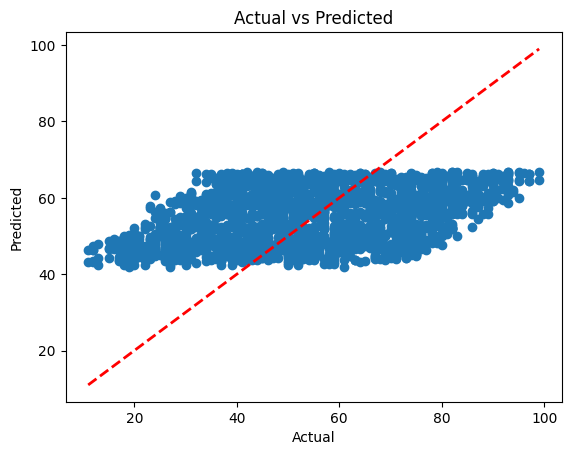

The max error is:  36.7468376159668
The mean absolute error is:  15.511654567718505
The r2 is:  0.13406064418059704
The root mean squared error is:  17.91380017264061


In [31]:
df_without_previous = df.drop("Previous Scores", axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_without_previous.drop("Performance Index", axis=1), df_without_previous["Performance Index"], test_size=0.2, random_state=42)

best_param,best_score = best_parameters_regression(X_train, y_train)
best_param

y_pred = predict_regression(X_train, y_train, X_test, best_param)
scores_regression(y_test, y_pred)